In [9]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt

In [10]:
df = pd.read_excel('data.xlsx')
df.head()

c:\Users\arsha\Downloads\ML\myenv\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.9
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.1,862.53,-149.76
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39


In [11]:
df.shape

(377719, 7)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377719 entries, 0 to 377718
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   time                      377719 non-null  datetime64[ns]
 1   Cyclone_Inlet_Gas_Temp    377719 non-null  object        
 2   Cyclone_Material_Temp     377719 non-null  object        
 3   Cyclone_Outlet_Gas_draft  377719 non-null  object        
 4   Cyclone_cone_draft        377719 non-null  object        
 5   Cyclone_Gas_Outlet_Temp   377719 non-null  object        
 6   Cyclone_Inlet_Draft       377719 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 20.2+ MB


Numerical cols stored as objects

In [13]:
# Convert object columns to float
cols_to_convert = [
    "Cyclone_Inlet_Gas_Temp",
    "Cyclone_Material_Temp",
    "Cyclone_Outlet_Gas_draft",
    "Cyclone_cone_draft",
    "Cyclone_Gas_Outlet_Temp",
    "Cyclone_Inlet_Draft",
]

df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors="coerce")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377719 entries, 0 to 377718
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   time                      377719 non-null  datetime64[ns]
 1   Cyclone_Inlet_Gas_Temp    376399 non-null  float64       
 2   Cyclone_Material_Temp     376128 non-null  float64       
 3   Cyclone_Outlet_Gas_draft  376398 non-null  float64       
 4   Cyclone_cone_draft        376399 non-null  float64       
 5   Cyclone_Gas_Outlet_Temp   376398 non-null  float64       
 6   Cyclone_Inlet_Draft       376397 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 20.2 MB


In [15]:
df.isnull().sum()/df.shape[0]

time                        0.000000
Cyclone_Inlet_Gas_Temp      0.003495
Cyclone_Material_Temp       0.004212
Cyclone_Outlet_Gas_draft    0.003497
Cyclone_cone_draft          0.003495
Cyclone_Gas_Outlet_Temp     0.003497
Cyclone_Inlet_Draft         0.003500
dtype: float64

very less percentage of vals missing, so cd remove them, but before that lets check some patterns
Wether it MCAR, MAR of MNAR 

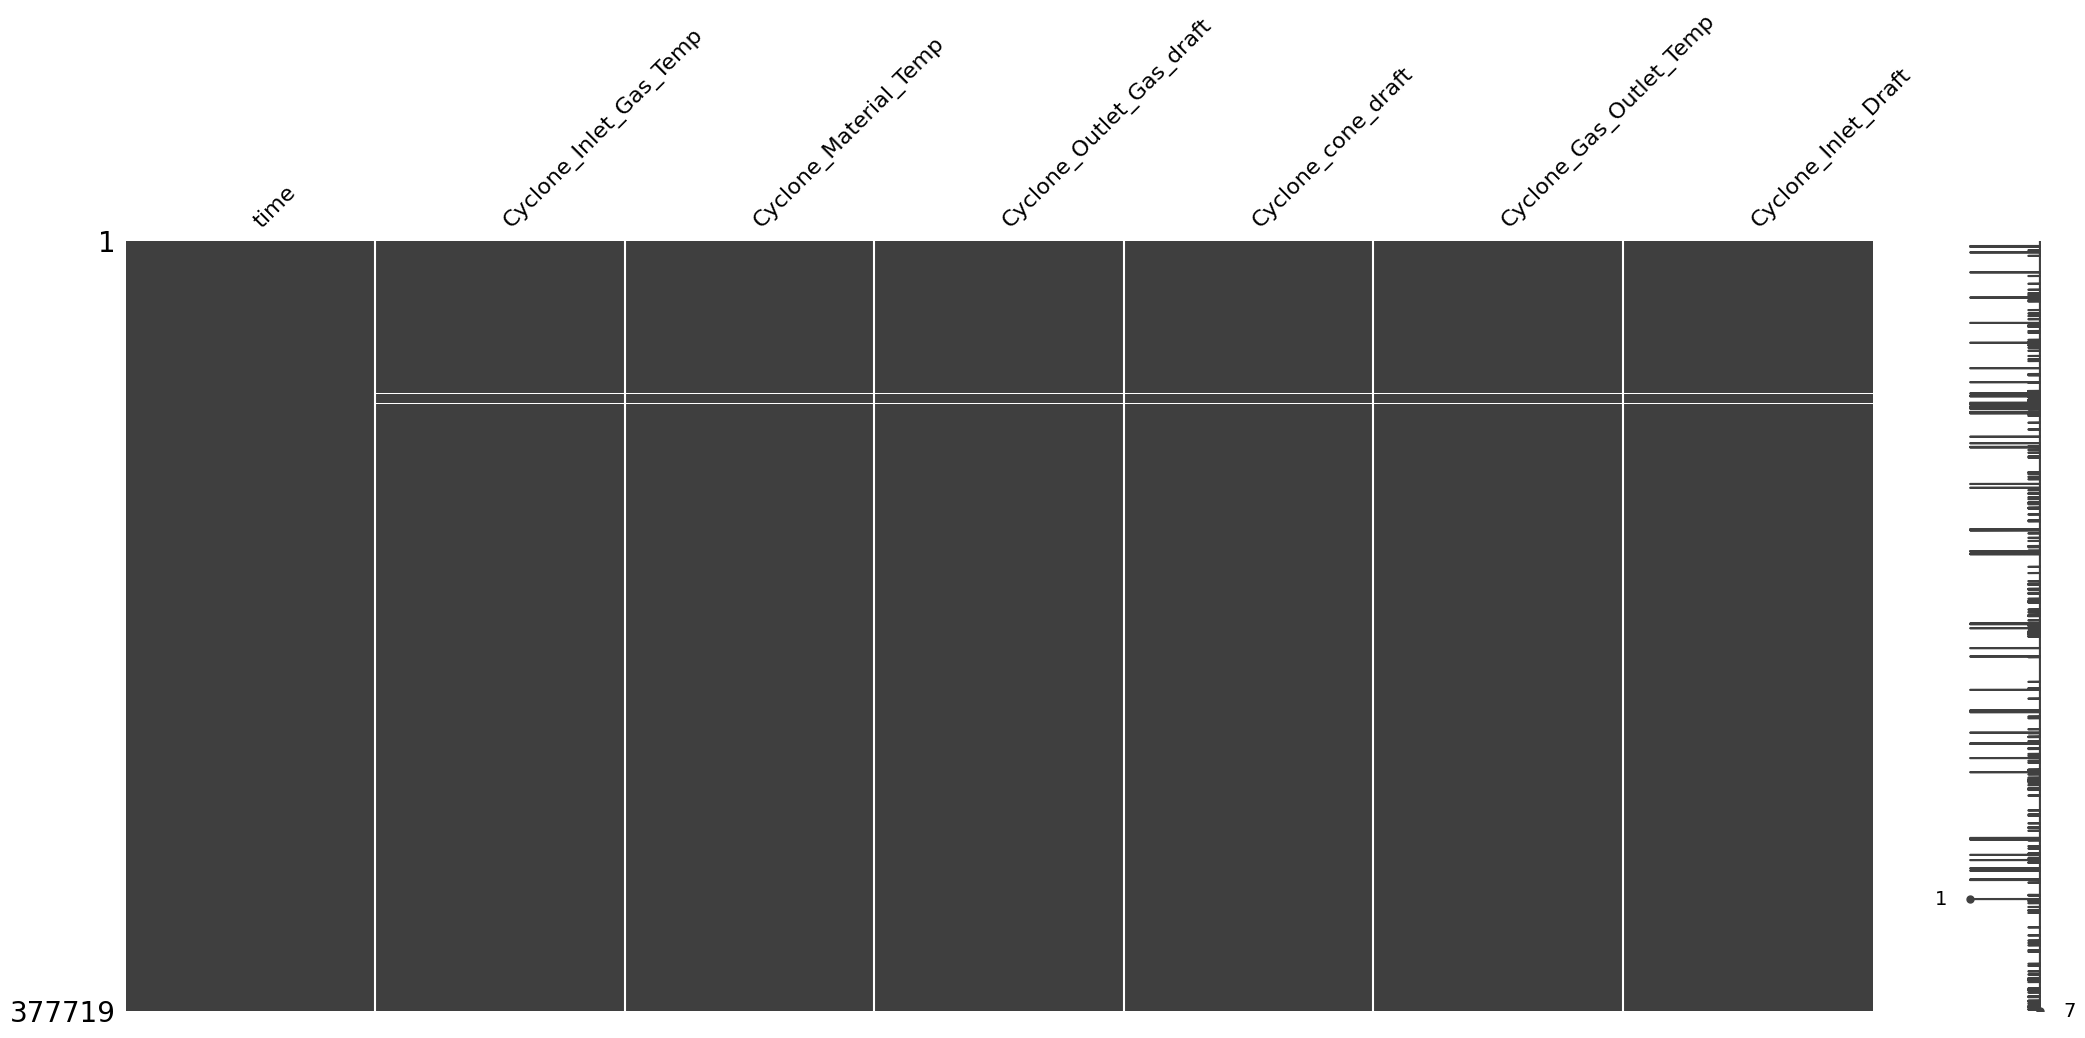

In [16]:
# Matrix chart to visualize missing values
msno.matrix(df)
plt.show()

Nothing much visible, but one thing clear that min cols is 1 in all the place4s, that means where one col apart from temp is missing rest all are missing as well

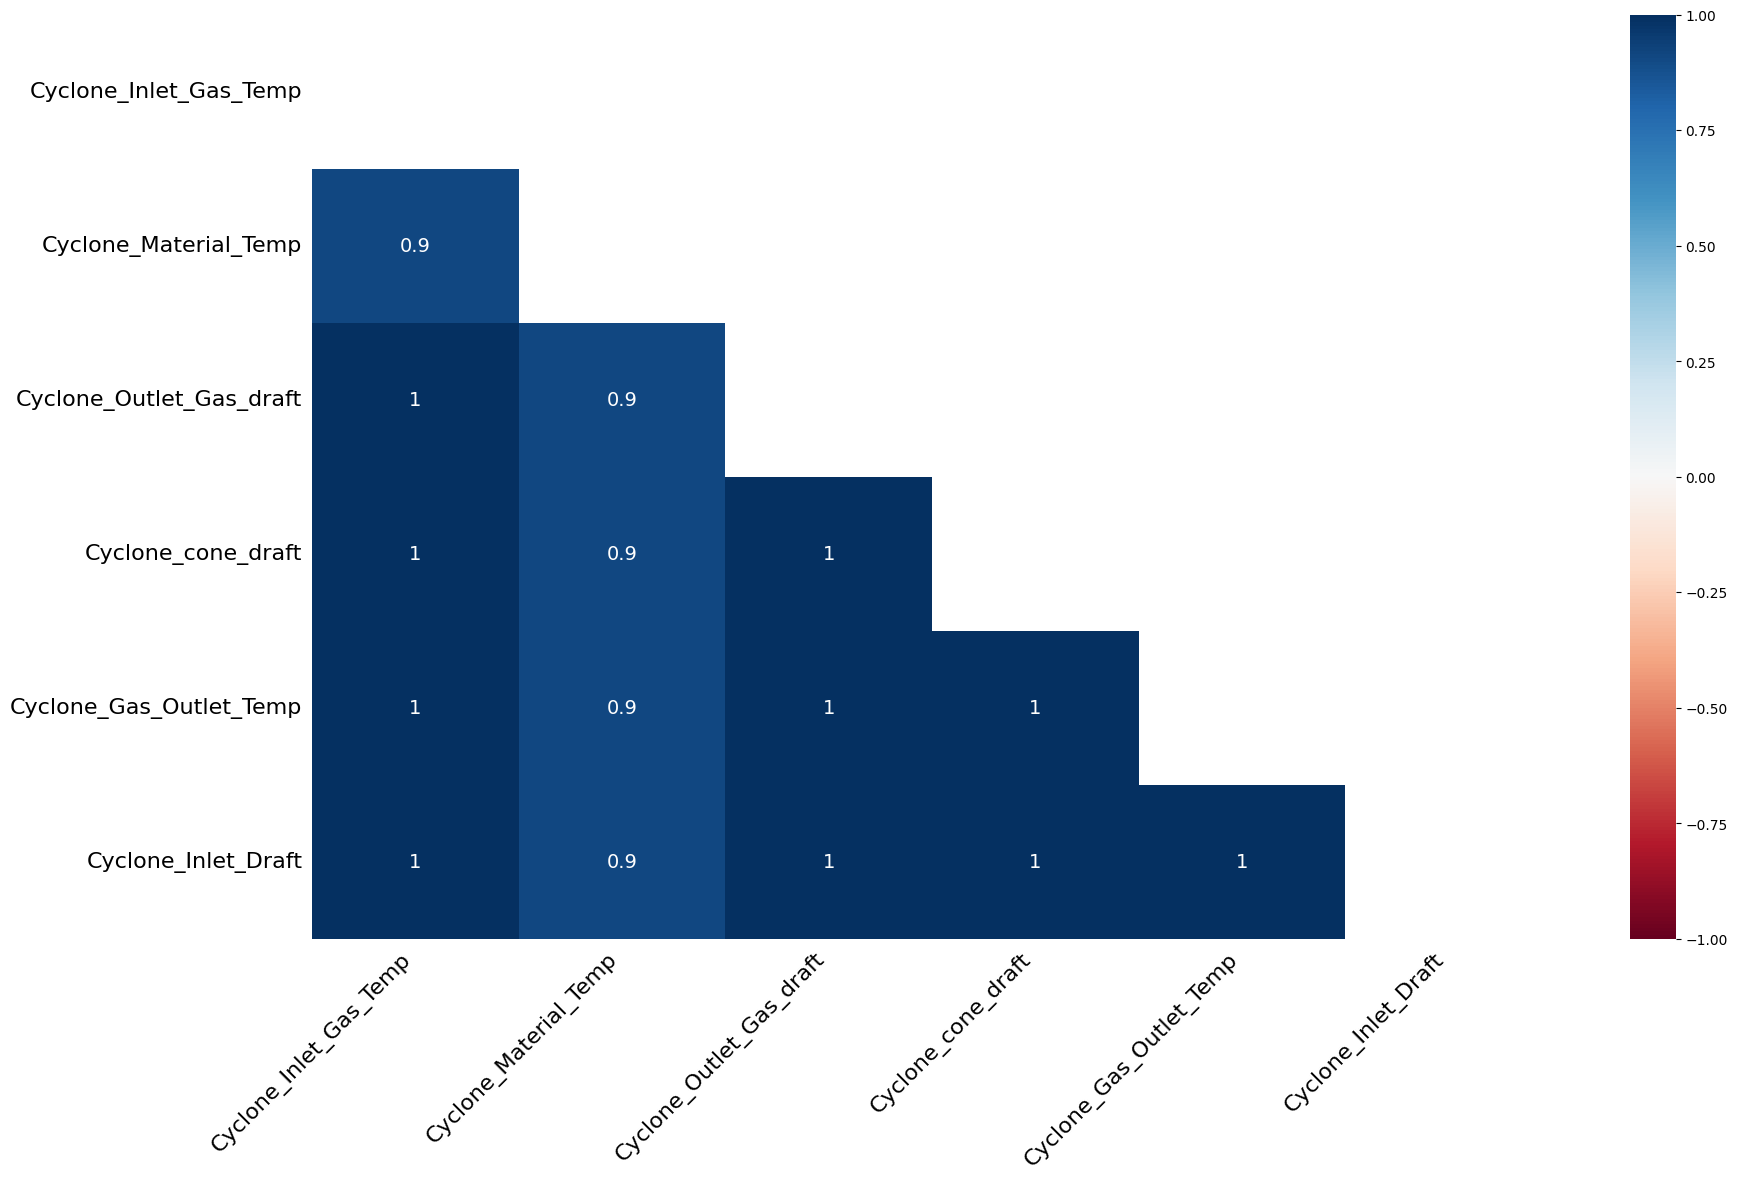

In [17]:
# Heatmap to visualize the correlation of missingness between columns
msno.heatmap(df)
plt.show()

as indicated above, thus the best option is to remove these missing vals, no way to impute

array([[<Axes: title={'center': 'time'}>,
        <Axes: title={'center': 'Cyclone_Inlet_Gas_Temp'}>,
        <Axes: title={'center': 'Cyclone_Material_Temp'}>],
       [<Axes: title={'center': 'Cyclone_Outlet_Gas_draft'}>,
        <Axes: title={'center': 'Cyclone_cone_draft'}>,
        <Axes: title={'center': 'Cyclone_Gas_Outlet_Temp'}>],
       [<Axes: title={'center': 'Cyclone_Inlet_Draft'}>, <Axes: >,
        <Axes: >]], dtype=object)

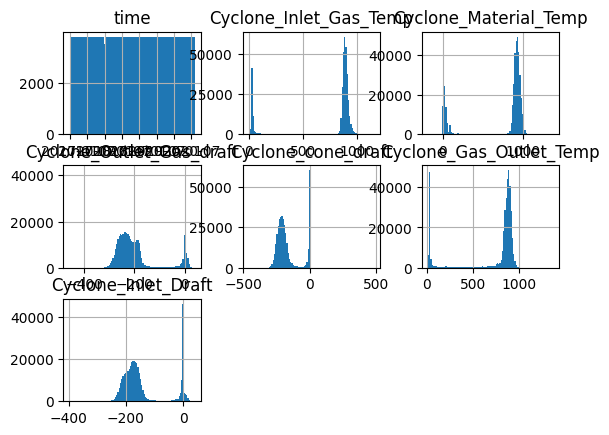

In [18]:
df.hist(bins = 100)

In [19]:
df = df.dropna(subset=df.columns[1:], how='all')

# Verify new shape after dropping rows
df.shape

(376399, 7)

In [20]:
df.isnull().sum()/df.shape[0]

time                        0.000000
Cyclone_Inlet_Gas_Temp      0.000000
Cyclone_Material_Temp       0.000720
Cyclone_Outlet_Gas_draft    0.000003
Cyclone_cone_draft          0.000000
Cyclone_Gas_Outlet_Temp     0.000003
Cyclone_Inlet_Draft         0.000005
dtype: float64

now lets check again with the help of missingo 

In [21]:
df.isnull().sum()

time                          0
Cyclone_Inlet_Gas_Temp        0
Cyclone_Material_Temp       271
Cyclone_Outlet_Gas_draft      1
Cyclone_cone_draft            0
Cyclone_Gas_Outlet_Temp       1
Cyclone_Inlet_Draft           2
dtype: int64

array([[<Axes: title={'center': 'time'}>,
        <Axes: title={'center': 'Cyclone_Inlet_Gas_Temp'}>,
        <Axes: title={'center': 'Cyclone_Material_Temp'}>],
       [<Axes: title={'center': 'Cyclone_Outlet_Gas_draft'}>,
        <Axes: title={'center': 'Cyclone_cone_draft'}>,
        <Axes: title={'center': 'Cyclone_Gas_Outlet_Temp'}>],
       [<Axes: title={'center': 'Cyclone_Inlet_Draft'}>, <Axes: >,
        <Axes: >]], dtype=object)

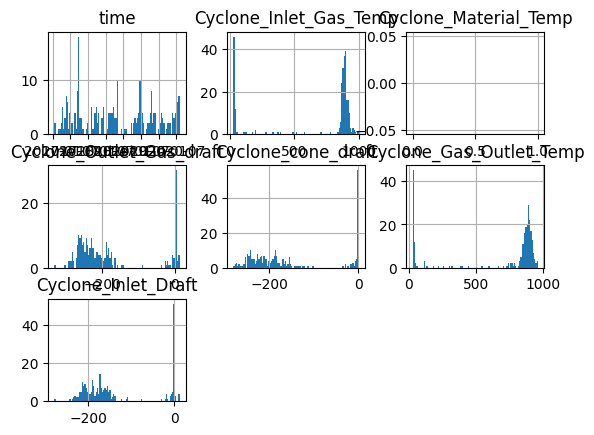

In [22]:
df[df['Cyclone_Material_Temp'].isnull()].hist(bins = 100)

array([[<Axes: title={'center': 'time'}>,
        <Axes: title={'center': 'Cyclone_Inlet_Gas_Temp'}>,
        <Axes: title={'center': 'Cyclone_Material_Temp'}>],
       [<Axes: title={'center': 'Cyclone_Outlet_Gas_draft'}>,
        <Axes: title={'center': 'Cyclone_cone_draft'}>,
        <Axes: title={'center': 'Cyclone_Gas_Outlet_Temp'}>],
       [<Axes: title={'center': 'Cyclone_Inlet_Draft'}>, <Axes: >,
        <Axes: >]], dtype=object)

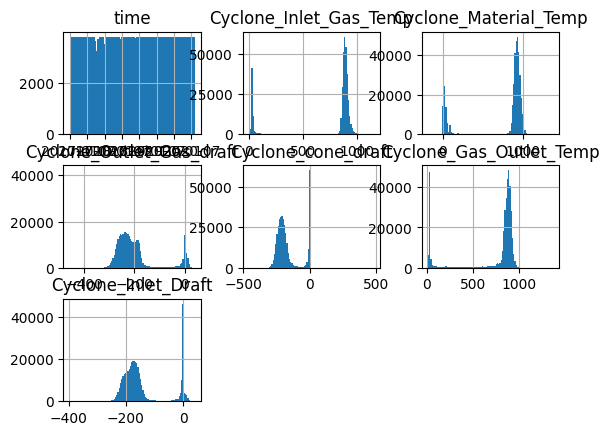

In [23]:
df.hist(bins = 100)

the entires where temp is missing has the same distribution, thus best option is removal confirmed

In [24]:
df = df.dropna(how='any')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 376124 entries, 0 to 377718
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   time                      376124 non-null  datetime64[ns]
 1   Cyclone_Inlet_Gas_Temp    376124 non-null  float64       
 2   Cyclone_Material_Temp     376124 non-null  float64       
 3   Cyclone_Outlet_Gas_draft  376124 non-null  float64       
 4   Cyclone_cone_draft        376124 non-null  float64       
 5   Cyclone_Gas_Outlet_Temp   376124 non-null  float64       
 6   Cyclone_Inlet_Draft       376124 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 23.0 MB


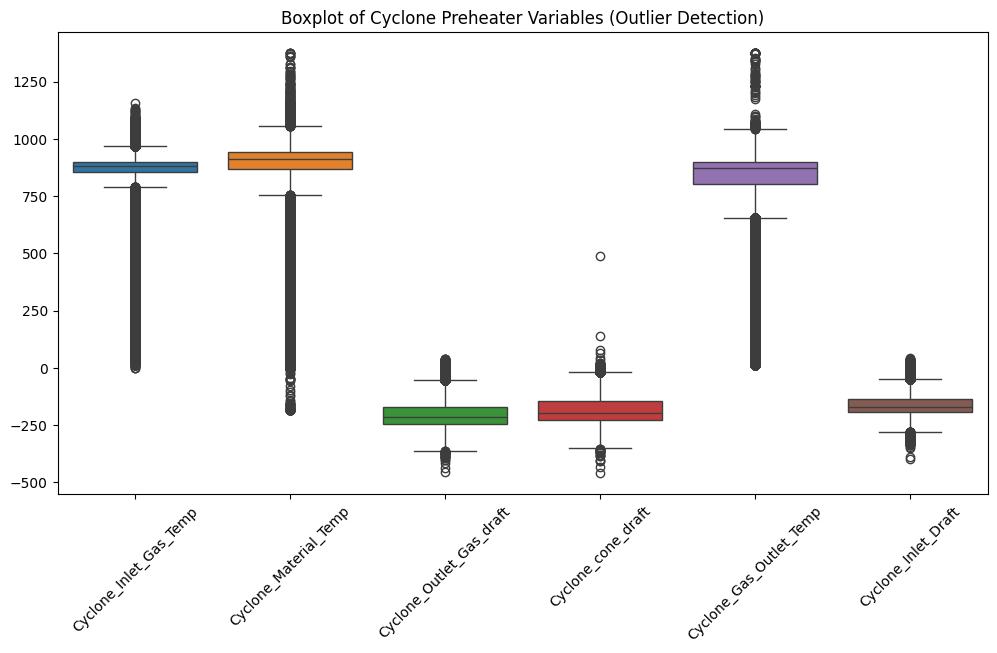

In [25]:
import seaborn as sns

# Set plot style

# Boxplot to visualize outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxplot of Cyclone Preheater Variables (Outlier Detection)")
plt.show()

maybe not outlier individually but as a whole

In [26]:
num_cols = [
    "Cyclone_Inlet_Gas_Temp", "Cyclone_Material_Temp", 
    "Cyclone_Outlet_Gas_draft", "Cyclone_cone_draft", 
    "Cyclone_Gas_Outlet_Temp", "Cyclone_Inlet_Draft"
]

In [27]:
from sklearn.preprocessing import StandardScaler
# Standardize numerical features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[num_cols])
df_scaled = pd.DataFrame(df_scaled, columns=num_cols)
df_scaled["time"] = df["time"]  # Keep timestamp

In [28]:
from sklearn.decomposition import PCA

# Apply PCA (retain 95% variance)
pca = PCA(n_components=0.95, random_state=42)
df_pca = pca.fit_transform(df_scaled.drop(columns=["time"]))
df_pca = pd.DataFrame(df_pca, columns=[f"PC{i+1}" for i in range(df_pca.shape[1])])
df_pca["time"] = df["time"]


In [ ]:
# Apply t-SNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, random_state=42, n_iter=1000)
df_tsne = tsne.fit_transform(df_scaled.drop(columns=["time"]))

# Convert t-SNE output to DataFrame
df_tsne = pd.DataFrame(df_tsne, columns=["TSNE1", "TSNE2"])
df_tsne["time"] = df["time"].values

# Plot t-SNE results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_tsne["TSNE1"], y=df_tsne["TSNE2"], alpha=0.5)
plt.title("t-SNE Visualization on Downsampled Data")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

c:\Users\arsha\Downloads\ML\myenv\lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


but what if the outlier is a local outlier

build a pipeline to try various anomaly detection techniques

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.cluster import DBSCAN
from sklearn.neighbors import LocalOutlierFactor
from sklearn.base import BaseEstimator, TransformerMixin
from skopt import BayesSearchCV
from skopt.space import Real, Integer

In [29]:
class TSNETransformer(BaseEstimator, TransformerMixin):
    def __init__(self, n_components=2, perplexity=30):
        self.n_components = n_components
        self.perplexity = perplexity

    def fit(self, X, y=None):
        return self  

    def transform(self, X):
        return TSNE(n_components=self.n_components, perplexity=self.perplexity, random_state=42).fit_transform(X)




In [30]:

feature_union = FeatureUnion([
    ("pca", PCA(n_components=0.95)),  # Reduce dimensions
    ("tsne", TSNETransformer(n_components=2)),  # t-SNE for better clustering
    ("raw_scaled", StandardScaler())  # Keep raw features standardized
])



In [31]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[num_cols])
df_scaled = pd.DataFrame(df_scaled, columns=num_cols)
df_scaled["time"] = df["time"]

In [32]:

df_transformed = feature_union.fit_transform(df_scaled.drop(columns=["time"]))

df_transformed = pd.DataFrame(df_transformed, columns=[f"Feature_{i}" for i in range(df_transformed.shape[1])])
df_transformed["time"] = df["time"]

# Plot transformed features
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df_transformed["Feature_0"], y=df_transformed["Feature_1"], alpha=0.5)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Feature Space After PCA & t-SNE")
plt.show()

KeyboardInterrupt: 

Models for anamoly detection

In [ ]:
models = {
    "Isolation Forest": IsolationForest(contamination=0.01, random_state=42),
    "DBSCAN": DBSCAN(eps=0.3, min_samples=5),
    "One-Class SVM": OneClassSVM(kernel="rbf", nu=0.01),
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20, contamination=0.01, novelty=True)
}

In [ ]:
pipeline = Pipeline([
    ("features", feature_union),
    ("model", models["Isolation Forest"])  # Default model, can be changed dynamically
])


In [ ]:
pipeline.fit(df_scaled.drop(columns=["time"]))

df["Anomaly_Score"] = pipeline.named_steps["model"].decision_function(pipeline.transform(df_scaled.drop(columns=["time"])))

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df["time"], df["Anomaly_Score"], label="Anomaly Score", alpha=0.7)
plt.xlabel("Time")
plt.ylabel("Anomaly Score")
plt.legend()
plt.title("Anomaly Scores Over Time")
plt.show()

foir hyper parameter turning use Bayes optmisiation

In [ ]:
param_space_iforest = {
    "model__n_estimators": Integer(50, 500),
    "model__max_features": Real(0.1, 1.0),
    "model__contamination": Real(0.01, 0.1)
}

In [ ]:
opt_iforest = BayesSearchCV(
    pipeline,
    search_spaces=param_space_iforest,
    n_iter=20,
    cv=3,
    n_jobs=-1,
    random_state=42
)

In [ ]:
opt_iforest.fit(df_scaled.drop(columns=["time"]))

print("Best Parameters for Isolation Forest:", opt_iforest.best_params_)

In [ ]:
pipeline.set_params(model=DBSCAN())
param_space_dbscan = {
    "model__eps": Real(0.1, 1.0),
    "model__min_samples": Integer(3, 20)
}

In [ ]:
opt_dbscan = BayesSearchCV(
    pipeline,
    search_spaces=param_space_dbscan,
    n_iter=20,
    cv=3,
    n_jobs=-1,
    random_state=42
)

opt_dbscan.fit(df_scaled.drop(columns=["time"]))
print("Best Parameters for DBSCAN:", opt_dbscan.best_params_)

Comparison

In [ ]:

for model_name, model in models.items():
    pipeline.set_params(model=model)
    pipeline.fit(df_scaled.drop(columns=["time"]))
    
    if model_name == "Local Outlier Factor":
        df[model_name] = model.decision_function(pipeline.transform(df_scaled.drop(columns=["time"])))
    else:
        df[model_name] = pipeline.named_steps["model"].decision_function(pipeline.transform(df_scaled.drop(columns=["time"])))

# Plot anomaly scores for all models
plt.figure(figsize=(12, 6))
for model_name in models.keys():
    plt.plot(df["time"], df[model_name], label=model_name, alpha=0.7)

plt.xlabel("Time")
plt.ylabel("Anomaly Score")
plt.legend()
plt.title("Comparison of Anomaly Detection Models")
plt.show()
